In [12]:
import sys
sys.path.append("../")
import models
import models_utils
from mcmc_utils import *
from utils import *

%matplotlib inline

In [13]:
import seaborn as sns
import math
import pandas as pd

In [76]:
m = models.PapaModelC8()
predict = m.predict
data = m.y
error = 0.01
weight_vector = m.domains

prior_min = [0.0001, 0.0001, 0.0001, 1., 3.5, 3.5, 3.5, 3.5]
prior_max = [1., 2., 2., 200., 9., 9., 9., 9.]

In [77]:
param_values = []
SAMPLES = 20000
for index in range(SAMPLES):
    while(True):
        params = initialise(prior_min, prior_max)
        LL = calculate_log_likelihood(data, error, weight_vector, params, m.predict)
        if (not math.isnan(LL)):
            break
    params.append(LL)
    param_values.append(params)
colmn_names = ["alpha", "D", "Co", "Ns", "K", "K1", "K2", "K3", "LL"]
param_values = pd.DataFrame(param_values, columns = colmn_names)

In [78]:
p = [0.18137638406, 1.54257972154, 0.0721779657506, 187.0, 5.53920680068, 6.13046808193, 6.11636776472, 6.24818280438]
calculate_log_likelihood(data, error, weight_vector, p, m.predict)

-23735.315903377523

In [133]:
THRESH = -170000
print sum(param_values["LL"] > THRESH)
#print param_values[param_values["LL"] > THRESH].mean()
#print param_values[param_values["LL"] > THRESH].std()
parm_vals = param_values[param_values["LL"] > THRESH]
corr = parm_vals[["alpha", "D", "Co", "Ns", "K", "K1", "K2", "K3"]].corr(method = "spearman")

296


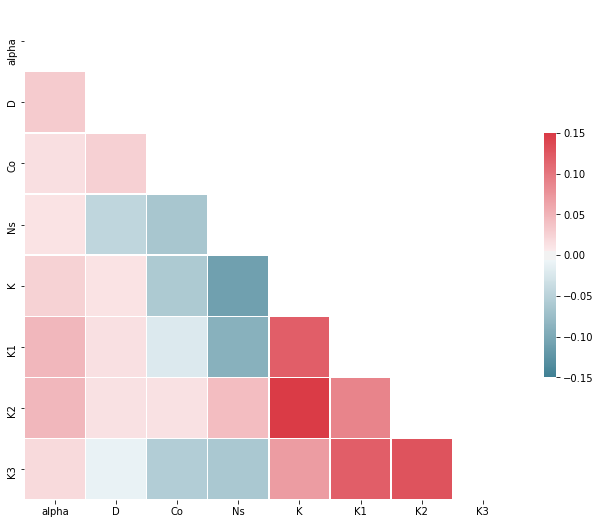

In [131]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.15, vmin = -0.15, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)